In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

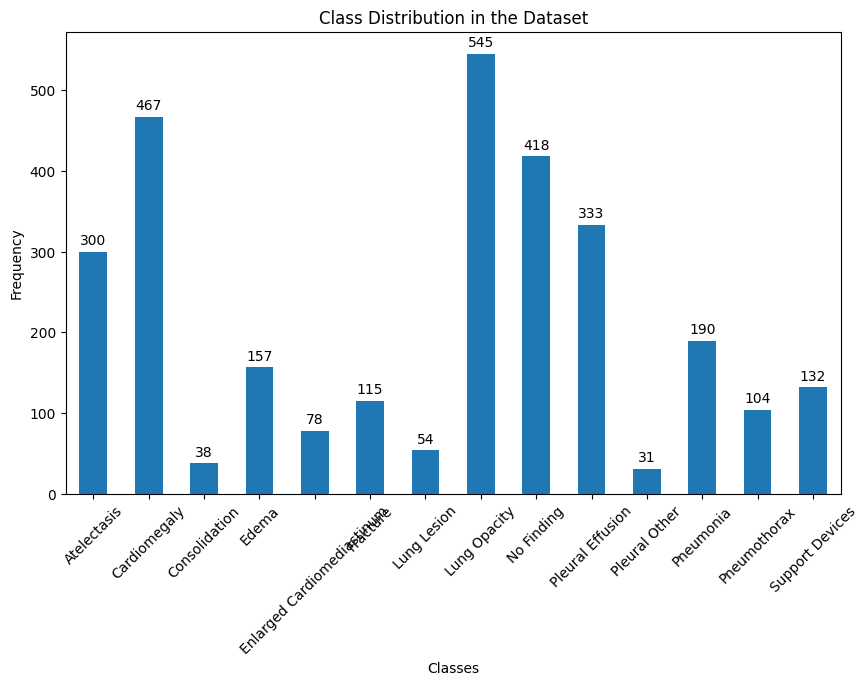

Class frequencies in numbers along with disease names:
Atelectasis: 300
Cardiomegaly: 467
Consolidation: 38
Edema: 157
Enlarged Cardiomediastinum: 78
Fracture: 115
Lung Lesion: 54
Lung Opacity: 545
No Finding: 418
Pleural Effusion: 333
Pleural Other: 31
Pneumonia: 190
Pneumothorax: 104
Support Devices: 132


In [ ]:

data = pd.read_csv('/content/drive/MyDrive/label1_p10.csv')
labels = data[[
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "Enlarged Cardiomediastinum", "Fracture", "Lung Lesion",
    "Lung Opacity", "No Finding", "Pleural Effusion", "Pleural Other",
    "Pneumonia", "Pneumothorax", "Support Devices"
]].to_numpy()

target_columns = [
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "Enlarged Cardiomediastinum", "Fracture", "Lung Lesion",
    "Lung Opacity", "No Finding", "Pleural Effusion", "Pleural Other",
    "Pneumonia", "Pneumothorax", "Support Devices"
]

data[target_columns] = data[target_columns].fillna(0)
data[target_columns] = data[target_columns].applymap(lambda x: 0 if x < 0 else x)

class_frequencies = data[target_columns].sum()

plt.figure(figsize=(10, 6))
bars = class_frequencies.plot(kind='bar')
plt.title('Class Distribution in the Dataset')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

plt.show()

class_frequencies_dict = class_frequencies.to_dict()
print("Class frequencies in numbers along with disease names:")
for disease, freq in class_frequencies_dict.items():
    print(f"{disease}: {freq}")


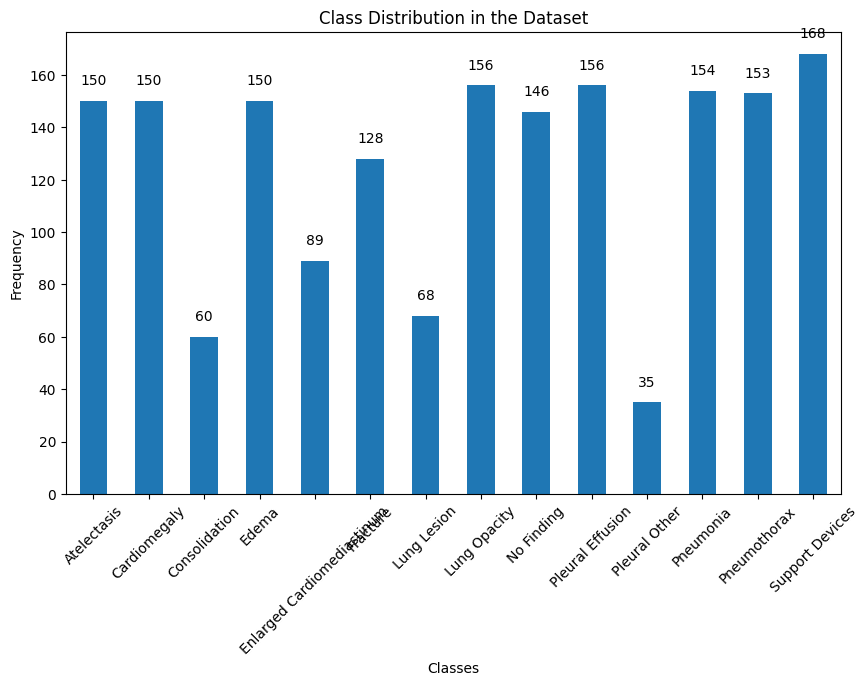

Class frequencies in numbers along with disease names:
Atelectasis: 150
Cardiomegaly: 150
Consolidation: 60
Edema: 150
Enlarged Cardiomediastinum: 89
Fracture: 128
Lung Lesion: 68
Lung Opacity: 156
No Finding: 146
Pleural Effusion: 156
Pleural Other: 35
Pneumonia: 154
Pneumothorax: 153
Support Devices: 168


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

data = pd.read_csv('/content/drive/MyDrive/500_updates.csv', usecols=lambda column: column not in ["subject_id", "study_id"])

image_paths = data['drive_path']
label_columns = [
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "Enlarged Cardiomediastinum", "Fracture", "Lung Lesion",
    "Lung Opacity", "No Finding", "Pleural Effusion", "Pleural Other",
    "Pneumonia", "Pneumothorax", "Support Devices"
]

data[target_columns] = data[label_columns].fillna(0)
data[target_columns] = data[label_columns].applymap(lambda x: 0 if x < 0 else x)
labels = data[label_columns].values

mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(image_paths, labels, test_size=0.2, random_state=42)
class_frequencies = data[label_columns].sum()

plt.figure(figsize=(10, 6))
bars = class_frequencies.plot(kind='bar')
plt.title('Class Distribution in the Dataset')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

plt.show()

class_frequencies_dict = class_frequencies.to_dict()
print("Class frequencies in numbers along with disease names:")
for disease, freq in class_frequencies_dict.items():
    print(f"{disease}: {freq}")



In [ ]:
from pathlib import Path

url = '/content/drive/MyDrive/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10'
path = Path(url)
urls = []
for item in path.glob('**/*'):
    if item.is_file():
        urls.append(item)


In [ ]:
import pandas as pd

url_list = []

subject_ids = []
study_ids = []
url_list = []

for u in urls:
    url = str(u)
    parts = url.split('/')
    subject_id = parts[10]
    subject_id = subject_id[1:]
    study_id = parts[11]
    study_id = study_id[1:]
    new_url = url
    subject_ids.append(subject_id)
    study_ids.append(study_id)
    url_list.append(new_url)

data = {'subject_id': subject_ids, 'study_id': study_ids, 'image_path': url_list}
df = pd.DataFrame(data)

df.to_csv('output.csv', index=False)



In [ ]:
output = pd.read_csv("output.csv")
report = pd.read_csv("report.csv")

In [ ]:
merged_df = output.merge(report, on='study_id')

In [ ]:
merged_df = merged_df.replace(-1, 0)
merged_df = merged_df.fillna(0)

In [ ]:
merged_df.to_csv("merged_df.csv", index=False)

In [ ]:
df = pd.read_csv("500.csv")

df = df.replace(-1, 0)
df = df.fillna(0)


df.to_csv("500_updates.csv")

In [ ]:
df = pd.read_csv("merged_df.csv")

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/500_updates.csv')
image_urls = df['drive_path']

In [ ]:
len(image_urls)

1432

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import os
not_exists = []

for image_url in image_urls:
  if not os.path.exists(image_url):
    print("The image file does not exist.")
    not_exists.append(image_url)


In [ ]:
not_exists

[]

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/p11_report_updated.csv")


In [ ]:
filtered_df = df[df['label'].apply(lambda x: len(ast.literal_eval(x)) == 1)]

In [ ]:
filtered_df.to_csv("p11_report_label1.csv")